## Predicting Heart Disease
This notebook looks into using Python based machine learning and data science libraries to build a machine learning model capable of predicting whether or not someone has a heart disease based on their medical attributes

What will be done:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
Given the clinical parameters, can we predict if a person has heart disease or not?

## 2. Data
Open source data from one of the below sites
https://www.kaggle.com/ronitf/heart-disease-uci
https://archive.ics.uci.edu/ml/datasets/Heart+Disease (what is used in this exercise is Cleveland data from this site)

## 3. Evaluation
If we can reach 95% accuracy in determining if a person has heart disease or not, then the project may be pursued from proof of concept.

## 4. Features
This is where we get information about each feature of the data.

Data Dictionary

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
   Value 1: typical angina
   Value 2: atypical angina
   Value 3: non-anginal pain
   Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
     Value 0: normal
     Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
     Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
     Value 1: upsloping
     Value 2: flat
     Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy (If colored means doctor can see blood flowing through the vessels)
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: diagnosis of heart disease (angiographic disease status) - predicted attribute
     Value 0: < 50% diameter narrowing
     Value 1: > 50% diameter narrowing

## Preparing the tools
Use Pandas, Matplotlib and numpy for data analysis and manipulation

In [2]:
## import necessary tools

## Regular exploratory data analysis (EDA) and plotting libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

##import model evaluations
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,plot_roc_curve
from sklearn.metrics import precision_score,recall_score,f1_score

## Load Data

In [5]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.shape

(303, 14)

## Data Exploration (EDA)
The goal is to find more about the data and become a subject matter expert on the data set

1. What question(s) are we trying to solve
2. What kind of data do we have and how do we treat different types
3. What is missing from the data and how do we deal with it
4. Where are the outliers and why should we care about them
5. How can we add, change, remove features to get more from the data

In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [10]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

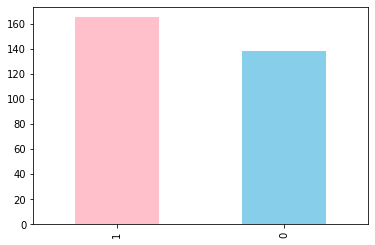

In [13]:
df.target.value_counts().plot(kind = "bar", color = ["pink","skyblue"])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
##Are there missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [21]:
df[df["target"] == 1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [22]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [27]:
##Compare target column with sex column
pd.crosstab(df.ca,df.target)

target,0,1
ca,,
0,45,130
1,44,21
2,31,7
3,17,3
4,1,4


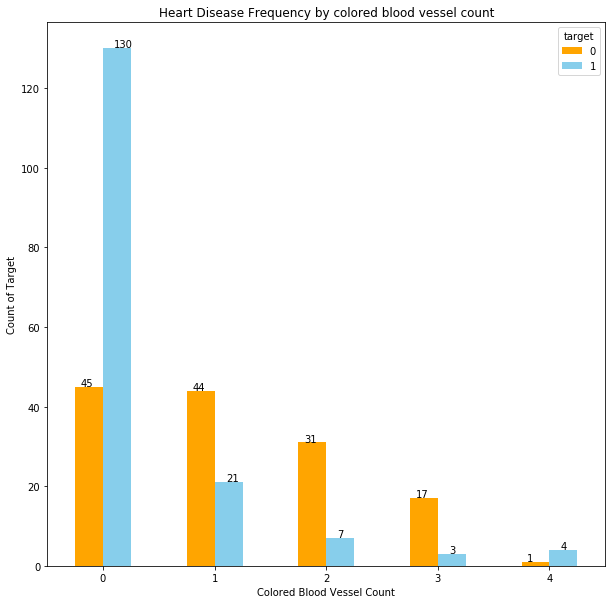

In [75]:
data = pd.crosstab(df.ca,df.target)
pd.crosstab(df.ca,df.target).plot(kind ="bar", figsize =(10,10), color = ["orange","skyblue"])
plt.title("Heart Disease Frequency by colored blood vessel count")
plt.xlabel("Colored Blood Vessel Count")
plt.ylabel("Count of Target")
plt.xticks(rotation = 0);
for i in range(2):
    for j in range(5):
        if i==0:
            plt.text(j-0.2,data[i][j]+0.2,str(data[i][j])) 
        else:
            plt.text(j+0.1,data[i][j]+0.2,str(data[i][j])) 

## Age vs Max heart rate(Thalach) for heart disease

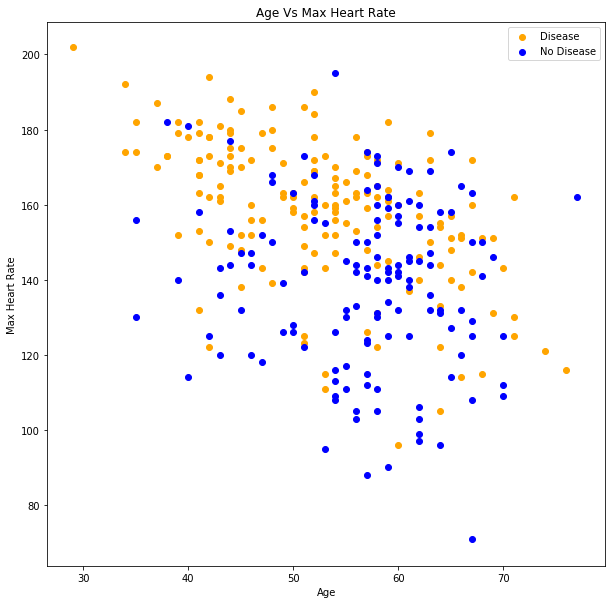

In [88]:
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(df.age[df.target == 1],df.thalach[df.target==1],c ='orange', label = "Disease")
ax.set(title = "Age Vs Max Heart Rate", 
       xlabel = 'Age', ylabel ="Max Heart Rate")

ax.scatter(df.age[df.target == 0],df.thalach[df.target==0],c ='blue',label = "No Disease")
ax.legend();

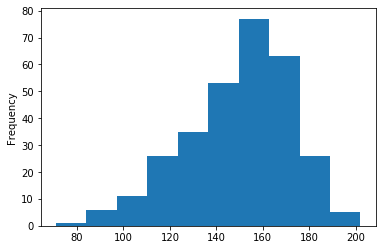

In [91]:
## Check the distribution of age, thalach using histogram
df.thalach.plot(kind = "hist");

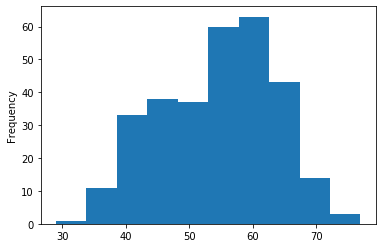

In [92]:
df.age.plot(kind = "hist");

In [93]:
## Compare chest pain type with heart disease
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


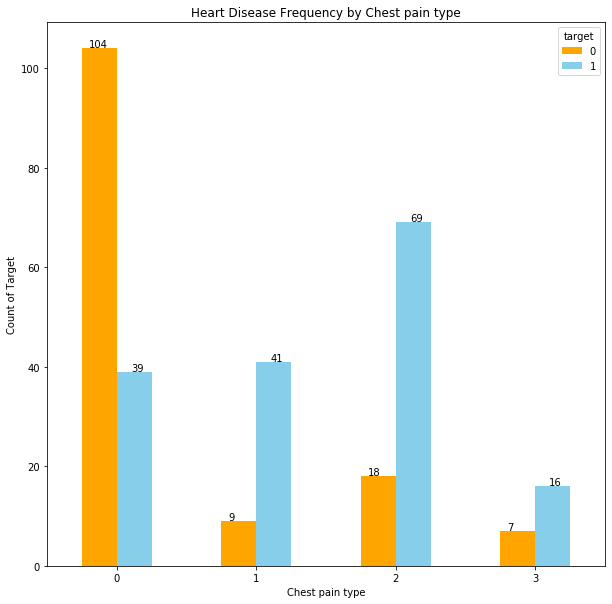

In [95]:
datacp = pd.crosstab(df.cp,df.target)
pd.crosstab(df.cp,df.target).plot(kind ="bar", figsize =(10,10), color = ["orange","skyblue"])
plt.title("Heart Disease Frequency by Chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Count of Target")
plt.xticks(rotation = 0);
for i in range(2):
    for j in range(4):
        if i==0:
            plt.text(j-0.2,datacp[i][j]+0.2,str(datacp[i][j])) 
        else:
            plt.text(j+0.1,datacp[i][j]+0.2,str(datacp[i][j])) 

In [96]:
## Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


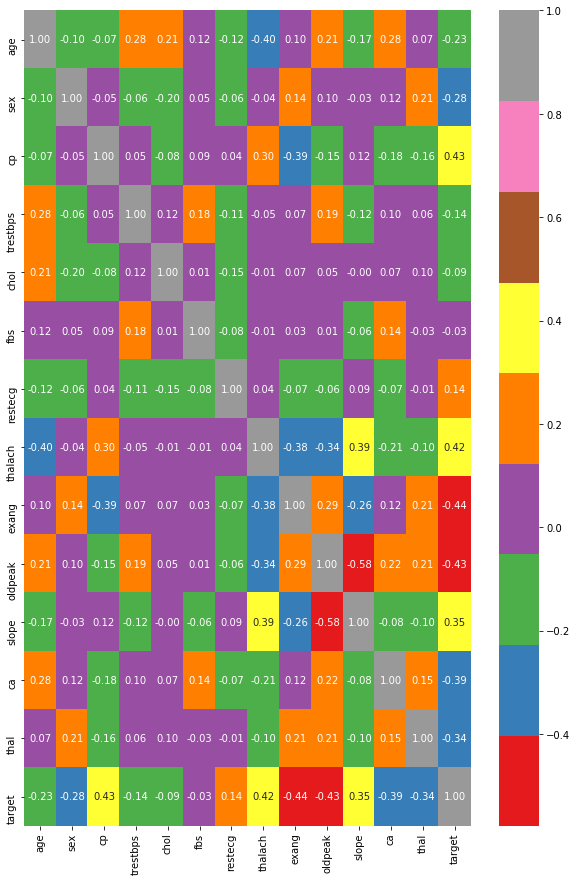

In [99]:
## Correlation matrix visual
corr_mat = df.corr()
fig, ax = plt.subplots(figsize = (10,15))
ax = sns.heatmap(corr_mat,
                annot = True,
                fmt =".2f",
                cmap ="Set1")

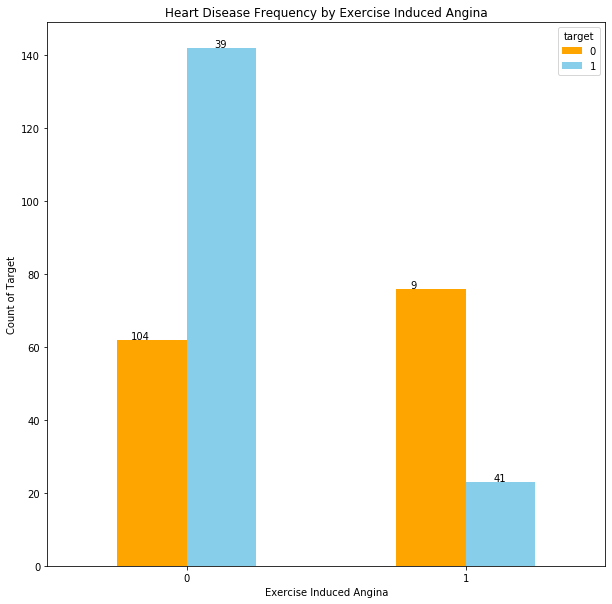

In [101]:
## Exercise induced angina vs heart disease

dataxang = pd.crosstab(df.exang,df.target)
pd.crosstab(df.exang,df.target).plot(kind ="bar", figsize =(10,10), color = ["orange","skyblue"])
plt.title("Heart Disease Frequency by Exercise Induced Angina")
plt.xlabel("Exercise Induced Angina")
plt.ylabel("Count of Target")
plt.xticks(rotation = 0);
for i in range(2):
    for j in range(2):
        if i==0:
            plt.text(j-0.2,dataxang[i][j]+0.2,str(datacp[i][j])) 
        else:
            plt.text(j+0.1,dataxang[i][j]+0.2,str(datacp[i][j])) 

## 5. Modelling

In [105]:
## Split data into x and y

X = df.drop("target", axis = 1)
y = df["target"]

## Split data into training and test
np.random.seed(42)
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size =0.2)

In [106]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

##Build machine learning model, Train and determine patterns, use patterns found on the test set
Try three models:
1. Logistic Regression
2. K Nearest Neighbours
3. Random Forest Classifier

In [117]:
model_dict ={"Logistic Regression":LogisticRegression(),
             "K Nearest Neighbors":KNeighborsClassifier(),
             "Random Forest Classifier":RandomForestClassifier()
            }

def fit_and_score(models,X_train,y_train,X_test,y_test):
    '''
    Fits and evaluates machine learning models
    '''
    np.random.seed(42)
    model_score ={}
    ##Loop through each model
    for name,model in model_dict.items():
        ## Fit the model using training data
        model.fit(X_train,y_train)
        ## Score the model using test data
        model_score[name] = round(model.score(X_test,y_test)*100,2)
    return model_score
        
model_scores = fit_and_score(model_dict,X_train,y_train,X_test,y_test)

C:\Users\srengaraman\machinelearning\sample-project\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [118]:
model_scores

{'Logistic Regression': 88.52,
 'K Nearest Neighbors': 68.85,
 'Random Forest Classifier': 83.61}

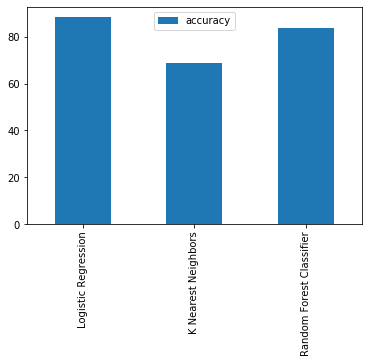

In [120]:
model_compare = pd.DataFrame(model_scores,index =["accuracy"])
model_compare.T.plot(kind = "bar");

##Let us perform the following:
1. Hyperparameter Tuning
2. Feature Importance
3. Confusion Matrix
4. Classification Report
5. Cross Validation Score
6. Precision Score
7. Recall Score
8. F1 Score
9. ROC curve
10. Area under curve

## Hyperparameter Tuning

In [123]:
## Lets tune KNN
train_scores=[]
test_scores=[]

neighbors = range(1,21)
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test, y_test))

In [124]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [125]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum test score: 75.41%


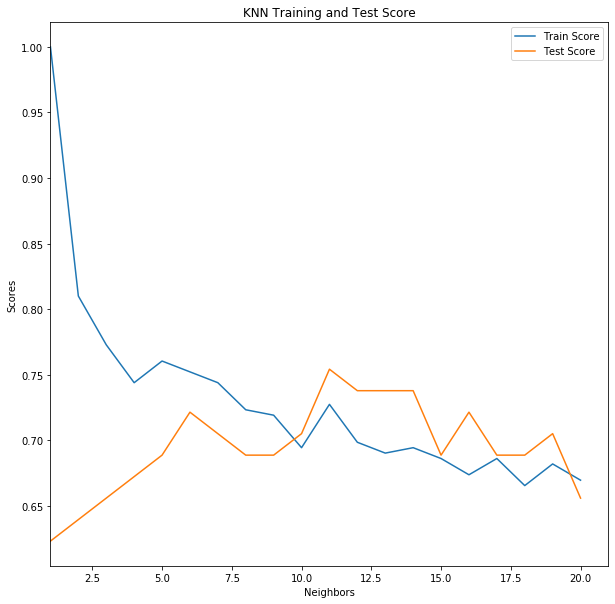

In [132]:
fig, ax = plt.subplots(figsize = (10,10))
ax.plot(neighbors,train_scores,label = "Train Score")
ax.plot(neighbors,test_scores,label = "Test Score")
ax.set(title ="KNN Training and Test Score", xlabel = "Neighbors", ylabel = "Scores")
ax.set_xlim(1,21)
ax.legend()
print(f'Maximum test score: {max(test_scores)*100:.2f}%')

## Hyperparameter Tuning using RandomizedSearchCV

Tune the following using RandomizedSearchCV
1. LogisticRegression()
2. RandomizedForestClassifier()

In [146]:
RS_Random_grid={"n_estimators":np.arange(10,1000,50),
                "max_depth": [None,3,5,10],
                "min_samples_split":np.arange(1,20,2),
                "min_samples_leaf":np.arange(2,20,2)
               }
clf = RandomForestClassifier()
rs_random_model = RandomizedSearchCV(estimator = clf,param_distributions = RS_Random_grid,n_iter = 20,
                              cv=5,verbose =2)

In [147]:
rs_random_model.fit(X_train,y_train)
rs_random_model.score(X_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=710, min_samples_split=11, min_samples_leaf=6, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=710, min_samples_split=11, min_samples_leaf=6, max_depth=5, total=   1.0s
[CV] n_estimators=710, min_samples_split=11, min_samples_leaf=6, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=710, min_samples_split=11, min_samples_leaf=6, max_depth=5, total=   0.9s
[CV] n_estimators=710, min_samples_split=11, min_samples_leaf=6, max_depth=5 
[CV]  n_estimators=710, min_samples_split=11, min_samples_leaf=6, max_depth=5, total=   0.9s
[CV] n_estimators=710, min_samples_split=11, min_samples_leaf=6, max_depth=5 
[CV]  n_estimators=710, min_samples_split=11, min_samples_leaf=6, max_depth=5, total=   1.4s
[CV] n_estimators=710, min_samples_split=11, min_samples_leaf=6, max_depth=5 
[CV]  n_estimators=710, min_samples_split=11, min_samples_leaf=6, max_depth=5, total=   1.0s
[CV] n_estimators=810, min_samples_split=17, min_samples_leaf=18, max_depth=5 
[CV]  n_estimators=810, min_samples_split=17, min_samples_leaf=18, max_depth=5, total=   1.1s
[CV] n_estimators=810, min_samples_split=17, min_samples_leaf=18, max_depth=5 
[CV]  n_estimators=810, min_samples_split=17, min_samples_leaf=18, max_depth=5, total=   1.1s
[CV] n_estimators=810, min_samples_split=17, min

[CV]  n_estimators=360, min_samples_split=17, min_samples_leaf=16, max_depth=5, total=   0.5s
[CV] n_estimators=910, min_samples_split=3, min_samples_leaf=16, max_depth=10 
[CV]  n_estimators=910, min_samples_split=3, min_samples_leaf=16, max_depth=10, total=   1.3s
[CV] n_estimators=910, min_samples_split=3, min_samples_leaf=16, max_depth=10 
[CV]  n_estimators=910, min_samples_split=3, min_samples_leaf=16, max_depth=10, total=   1.3s
[CV] n_estimators=910, min_samples_split=3, min_samples_leaf=16, max_depth=10 
[CV]  n_estimators=910, min_samples_split=3, min_samples_leaf=16, max_depth=10, total=   1.2s
[CV] n_estimators=910, min_samples_split=3, min_samples_leaf=16, max_depth=10 
[CV]  n_estimators=910, min_samples_split=3, min_samples_leaf=16, max_depth=10, total=   1.2s
[CV] n_estimators=910, min_samples_split=3, min_samples_leaf=16, max_depth=10 
[CV]  n_estimators=910, min_samples_split=3, min_samples_leaf=16, max_depth=10, total=   1.2s
[CV] n_estimators=710, min_samples_split=

C:\Users\srengaraman\machinelearning\sample-project\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=560, min_samples_split=1, min_samples_leaf=14, max_depth=None, total=   0.2s
[CV] n_estimators=560, min_samples_split=1, min_samples_leaf=14, max_depth=None 


C:\Users\srengaraman\machinelearning\sample-project\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=560, min_samples_split=1, min_samples_leaf=14, max_depth=None, total=   0.2s
[CV] n_estimators=560, min_samples_split=1, min_samples_leaf=14, max_depth=None 


C:\Users\srengaraman\machinelearning\sample-project\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=560, min_samples_split=1, min_samples_leaf=14, max_depth=None, total=   0.2s
[CV] n_estimators=560, min_samples_split=1, min_samples_leaf=14, max_depth=None 


C:\Users\srengaraman\machinelearning\sample-project\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\srengaraman\machinelearning\sample-project\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=560, min_samples_split=1, min_samples_leaf=14, max_depth=None, total=   0.2s
[CV] n_estimators=560, min_samples_split=1, min_samples_leaf=14, max_depth=None 
[CV]  n_estimators=560, min_samples_split=1, min_samples_leaf=14, max_depth=None, total=   0.2s
[CV] n_estimators=760, min_samples_split=17, min_samples_leaf=8, max_depth=None 
[CV]  n_estimators=760, min_samples_split=17, min_samples_leaf=8, max_depth=None, total=   1.0s
[CV] n_estimators=760, min_samples_split=17, min_samples_leaf=8, max_depth=None 
[CV]  n_estimators=760, min_samples_split=17, min_samples_leaf=8, max_depth=None, total=   1.0s
[CV] n_estimators=760, min_samples_split=17, min_samples_leaf=8, max_depth=None 
[CV]  n_estimators=760, min_samples_split=17, min_samples_leaf=8, max_depth=None, total=   1.1s
[CV] n_estimators=760, min_samples_split=17, min_samples_leaf=8, max_depth=None 
[CV]  n_estimators=760, min_samples_split=17, min_samples_leaf=8, max_depth=None, total=   1.1s
[CV] n_estimators=7

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


0.8688524590163934

In [148]:
RS_log_grid ={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}
log_reg = LogisticRegression()
rs_log_model = RandomizedSearchCV(estimator = log_reg,param_distributions = RS_log_grid,n_iter = 20,
                              cv=5,verbose =2)

In [149]:
rs_log_model.fit(X_train,y_train)
rs_log_model.score(X_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.00026366508987303583 ......................
[CV] ....... solver=liblinear, C=0.00026366508987303583, total=   0.0s
[CV] solver=liblinear, C=0.00026366508987303583 ......................
[CV] ....... so

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......... solver=liblinear, C=0.08858667904100823, total=   0.0s
[CV] solver=liblinear, C=0.08858667904100823 .........................
[CV] .......... solver=liblinear, C=0.08858667904100823, total=   0.0s
[CV] solver=liblinear, C=0.23357214690901212 .........................
[CV] .......... solver=liblinear, C=0.23357214690901212, total=   0.0s
[CV] solver=liblinear, C=0.23357214690901212 .........................
[CV] .......... solver=liblinear, C=0.23357214690901212, total=   0.0s
[CV] solver=liblinear, C=0.23357214690901212 .........................
[CV] .......... solver=liblinear, C=0.23357214690901212, total=   0.0s
[CV] solver=liblinear, C=0.23357214690901212 .........................
[CV] .......... solver=liblinear, C=0.23357214690901212, total=   0.0s
[CV] solver=liblinear, C=0.23357214690901212 .........................
[CV] .......... solver=liblinear, C=0.23357214690901212, total=   0.0s
[CV] solver=liblinear, C=0.615848211066026 ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


0.8852459016393442

In [150]:
rs_log_model.best_params_
#{'solver': 'liblinear', 'C': 0.23357214690901212}

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [151]:
rs_random_model.best_params_
# {'n_estimators': 110,
#  'min_samples_split': 17,
#  'min_samples_leaf': 6,
#  'max_depth': 10}

{'n_estimators': 110,
 'min_samples_split': 17,
 'min_samples_leaf': 6,
 'max_depth': 10}

## Tuning hyperparameters of Logistic Regression using GridSearchCV
Since Logistic Regression provides the best score so far, we will try to further improve 
it using GridSearchCV

In [153]:
GS_log_grid ={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}
GS_log_model = GridSearchCV(estimator = log_reg,param_grid = GS_log_grid,
                              cv=5,verbose =2)

In [154]:
GS_log_model.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.00018873918221350977, solver=liblinear ......................
[CV] ....... C=0.00018873918221350977, solver=liblinear, total=   0.0s
[CV] C=0.00018873918221350977, solver=liblinear ......................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] ......... C=0.008531678524172805, solver=liblinear, total=   0.0s
[CV] C=0.008531678524172805, solver=liblinear ........................
[CV] ......... C=0.008531678524172805, solver=liblinear, total=   0.0s
[CV] C=0.008531678524172805, solver=liblinear ........................
[CV] ......... C=0.008531678524172805, solver=liblinear, total=   0.0s
[CV] C=0.01610262027560939, solver=liblinear .........................
[CV] .......... C=0.01610262027560939, solver=liblinear, total=   0.0s
[CV] C=0.01610262027560939, solver=liblinear .........................
[CV] .......... C=0.01610262027560939, solver=liblinear, total=   0.0s
[CV] C=0.01610262027560939, solver=liblinear .........................
[CV] .......... C=0.01610262027560939, solver=liblinear, total=   0.0s
[CV] C=0.01610262027560939, solver=liblinear .........................
[CV] .......... C=0.01610262027560939, solver=liblinear, total=   0.0s
[CV] C=0.01610262027560939, solver=liblinear .........................
[CV] 

[CV] ........... C=117.21022975334793, solver=liblinear, total=   0.0s
[CV] C=117.21022975334793, solver=liblinear ..........................
[CV] ........... C=117.21022975334793, solver=liblinear, total=   0.0s
[CV] C=117.21022975334793, solver=liblinear ..........................
[CV] ........... C=117.21022975334793, solver=liblinear, total=   0.0s
[CV] C=117.21022975334793, solver=liblinear ..........................
[CV] ........... C=117.21022975334793, solver=liblinear, total=   0.0s
[CV] C=221.22162910704503, solver=liblinear ..........................
[CV] ........... C=221.22162910704503, solver=liblinear, total=   0.0s
[CV] C=221.22162910704503, solver=liblinear ..........................
[CV] ........... C=221.22162910704503, solver=liblinear, total=   0.0s
[CV] C=221.22162910704503, solver=liblinear ..........................
[CV] ........... C=221.22162910704503, solver=liblinear, total=   0.0s
[CV] C=221.22162910704503, solver=liblinear ..........................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


0.8852459016393442

In [244]:
GS_log_model.score(X_test,y_test)

0.8852459016393442

In [245]:
GS_log_model.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [157]:
model_scores

{'Logistic Regression': 88.52,
 'K Nearest Neighbors': 68.85,
 'Random Forest Classifier': 83.61}

## Evaluating the tuned machine learning classification beyond accuracy

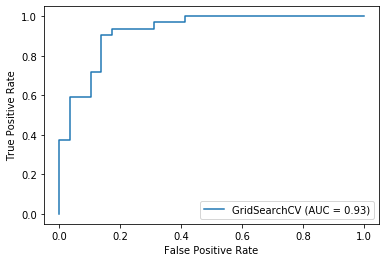

In [161]:
##Make predictions on tuned model
y_preds = GS_log_model.predict(X_test)
plot_roc_curve(GS_log_model,X_test,y_test);

In [162]:
confusion_matrix(y_test,y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

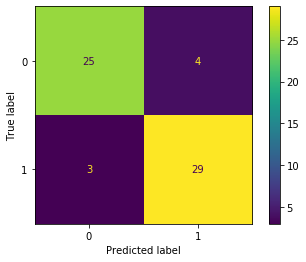

In [164]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(GS_log_model,X_test,y_test)

In [165]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [246]:
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')
cv_prec = np.mean(cross_val_score(clf,X,y,scoring = "precision",cv = 5))

In [247]:
cv_acc = np.mean(cross_val_score(clf,X,y,scoring = "accuracy",cv = 5))

In [248]:
cv_recall=np.mean(cross_val_score(clf,X,y,scoring = "recall",cv = 5))

In [249]:
cv_f1 = np.mean(cross_val_score(clf,X,y,scoring = "f1",cv = 5))
cv_f1

0.8673007976269721

In [282]:
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_prec,
                          "Recall":cv_recall,
                          "F1":cv_f1},index =[0])
cv_metrics_T = pd.DataFrame(cv_metrics.T)
cv_metrics_T.reset_index(drop = True,inplace = True)
cv_metrics_T["Metric"] = ["Accuracy","Precision","Recall","F1"]
cv_metrics_T.rename(columns ={0:'Score'},inplace  = True)
cv_metrics_T.Score = round(cv_metrics_T.Score,2)
cv_metrics_T

,Score,Metric
0,0.84,Accuracy
1,0.82,Precision
2,0.92,Recall
3,0.87,F1


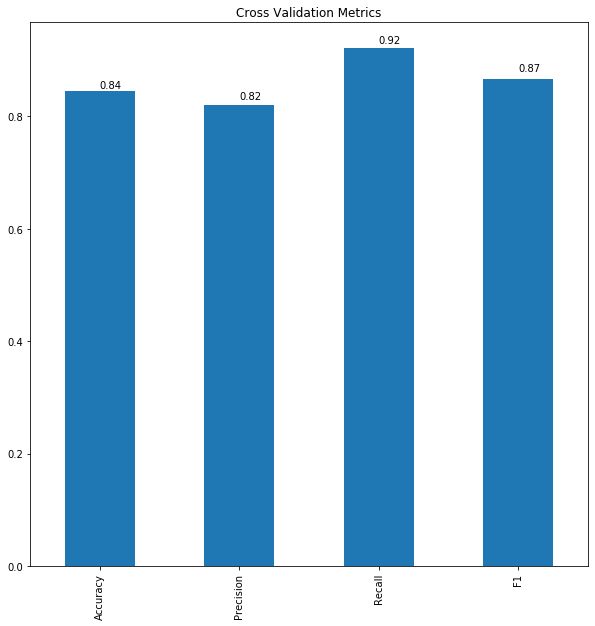

In [286]:
cv_metrics.T.plot.bar(title = "Cross Validation Metrics", legend = False,figsize =(10,10))       
for i in range(len(cv_metrics_T)):
    plt.text(i,cv_metrics_T.Score[i]+0.01,str(cv_metrics_T.Score[i]))

## Feature Importance

Finding feature importance varies for different machine learning models

Finding feature importance for Logistic Regression model

In [288]:
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [289]:
##Check coefficient
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [294]:
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

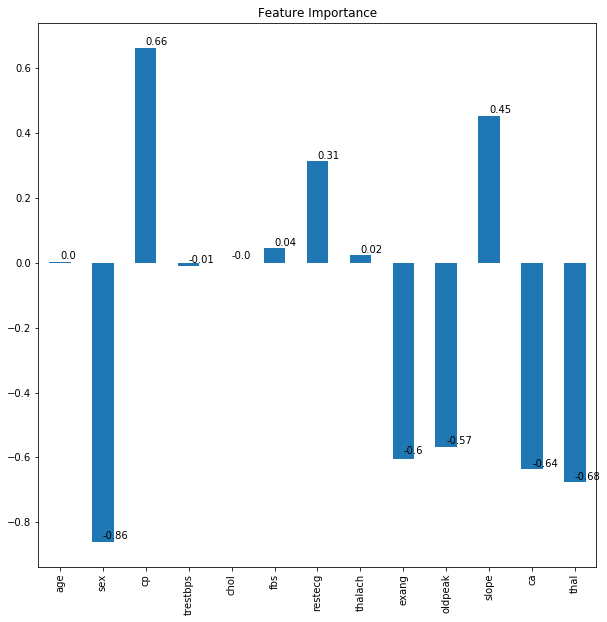

In [302]:
feature_coeff = pd.DataFrame(feature_dict,index =[0])
feature_coeff_T = pd.DataFrame(feature_coeff.T)
feature_coeff_T.reset_index(inplace = True)
feature_coeff_T.rename(columns ={index:"Feature",0:"Coefficient"},inplace  = True)
feature_coeff_T.Coefficient = round(feature_coeff_T.Coefficient,2)
feature_coeff.T.plot.bar(title = "Feature Importance", legend = False,figsize =(10,10))       
for i in range(len(feature_coeff_T)):
    plt.text(i,feature_coeff_T.Coefficient[i]+0.01,str(feature_coeff_T.Coefficient[i]))

## 6. Experimentation

If evaluation metric of 95% not reached, what else can be done?
1. Can we collet more data
2. Can we try a different model? - Like CatBoost or XGBoost
3. Could we improve current models?
4. Can we reduce features based on feature importance?

If model is good enough, export using joblib library

In [305]:
from joblib import dump,load
dump(clf,"Heart_Disease_Logistic_regression.joblib")

['Heart_Disease_Logistic_regression.joblib']